In [22]:
# Business Sales Performance Analysis
### Data Science & Analytics Internship – Task 1


## Project Objective

The objective of this project is to analyze e-commerce sales data to identify revenue trends, top-performing products, and regional performance. 

The goal is to generate actionable business insights and recommendations to improve sales performance.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
import os
os.listdir()

['.anaconda',
 '.cache',
 '.conda',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.zenmap',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'data.csv',
 'Documents',
 'Downloads',
 'Favorites',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{e4fa66e6-69aa-11f0-a87f-c89402ca7c80}.TM.blf',
 'NTUSER.DAT{e4fa66e6-69aa-11f0-a87f-c89402ca7c80}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{e4fa66e6-69aa-11f0-a87f-c89402ca7c80}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'Templates',
 'Untitled.ipynb',
 'untitled.py',
 'Untitled1.ipynb',
 'Videos',
 'ZAP']

In [3]:
df = pd.read_csv("data.csv", encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape


(541909, 8)

In [5]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df = df[df['Quantity'] > 0]


In [9]:
df = df[df['UnitPrice'] > 0]


In [10]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [12]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month


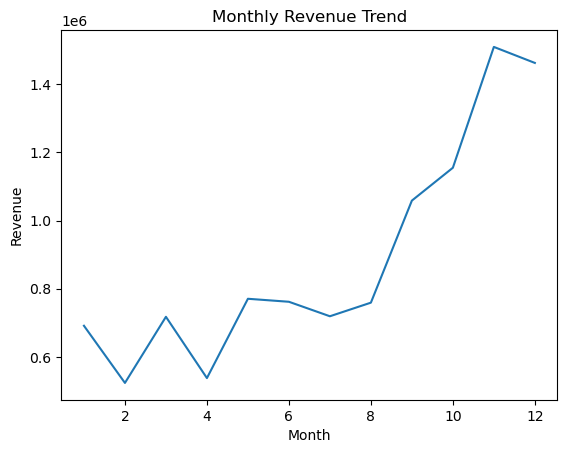

In [21]:
monthly_sales = df.groupby('Month')['Revenue'].sum().reset_index()

plt.figure()
sns.lineplot(data=monthly_sales, x='Month', y='Revenue')
plt.title("Monthly Revenue Trend")
plt.show()


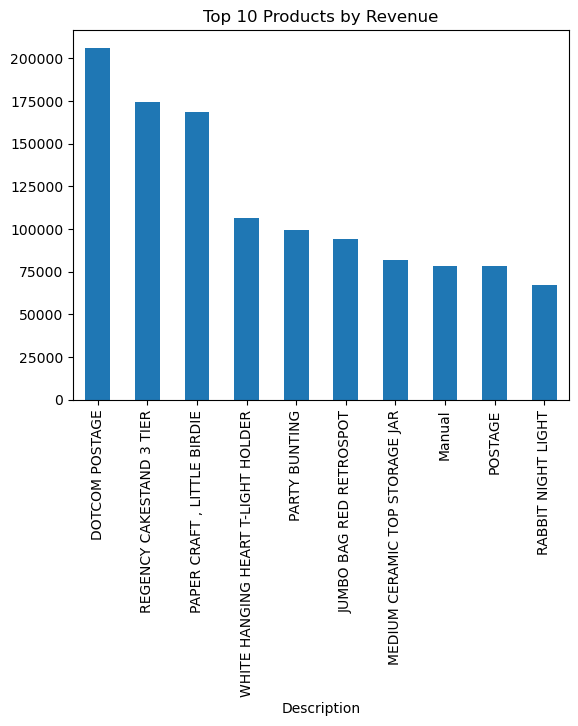

In [17]:
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.show()


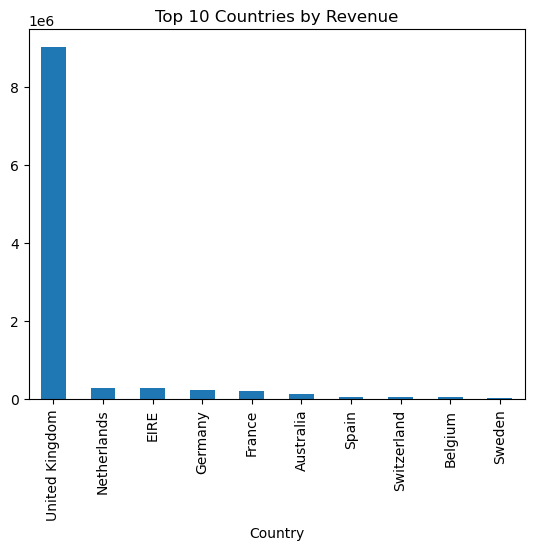

In [19]:
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure()
country_sales.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.show()


In [20]:
total_revenue = df['Revenue'].sum()
total_orders = df['InvoiceNo'].nunique()
total_customers = df['CustomerID'].nunique()

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)


Total Revenue: 10666684.544
Total Orders: 19960
Total Customers: 4338


## Key Insights

 Revenue shows strong growth in the last quarter of the year, with the highest revenue observed in Month 11.
 A small number of products generate a large share of total revenue.
 Certain countries contribute significantly more revenue compared to others.

## Business Recommendations

 Increase inventory and marketing activities before the peak season (Months 9–11).
 Use seasonal trends for better forecasting and supply chain planning.
